<a href="https://colab.research.google.com/github/peguescj/data-management/blob/main/PS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS5

##Tool Uploading

Going with a full fresh slate for PS5, to clean up allof my prior documentation and stave off file bloat.

Thoughts, notes, and sources: https://docs.google.com/document/d/1GSLGDtX9xJvlm0Vxj_0sWzanx0HhvD5iqQ0e8M9871g/edit?usp=sharing

In [2]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=8f9599d2cd274a67eebdc83e5876cf02584c2ebf4074da092308f5bc9d48665d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

In [3]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

In [4]:
# basic navigation
#wd =  'CountyRates.xlsx'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
sample_data


## Data Uploading (County)

In [5]:
#Let's start by uploading our major 5 merged datasets.

In [6]:
#DOE doesn't have the data at County level. Found a database that drew from the DOE sample to present Grad Rates at the county level.
#urllib.request.urlretrieve("https://docs.google.com/uc?id=107VTwNv2HyDMnZk41-h0yD-5T4Nv8v2Z&export=download ", "CountyRates.xlsx")
!wget -q -O CountyRates.xlsx https://docs.google.com/uc?id=107VTwNv2HyDMnZk41-h0yD-5T4Nv8v2Z&export=download

In [7]:
dat=pd.read_excel('CountyRates.xlsx', sheet_name='Additional Measure Data',skiprows=[0,2])
#Skipping a junk row and the state level data row.

In [8]:
CountyGrad=dat[['County','High School Graduation Rate']]

In [9]:
CountyGrad

County  High School Graduation Rate
0     Atlantic                    90.094340
1       Bergen                    95.283082
2   Burlington                    95.197921
3       Camden                    88.195373
4     Cape May                    91.222959
5   Cumberland                    86.446719
6        Essex                    88.256066
7   Gloucester                    92.791424
8       Hudson                    84.982456
9    Hunterdon                    95.920667
10      Mercer                    87.485762
11   Middlesex                    92.375180
12    Monmouth                    94.688806
13      Morris                    95.168138
14       Ocean                    92.722949
15     Passaic                    85.071284
16       Salem                    95.798969
17    Somerset                    94.173170
18      Sussex                    93.750149
19       Union                    88.653167
20      Warren                    92.424499

In [10]:
#Here's the causes of death in NJ with rates by county.
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1GWBGqsePB4fu1PJ5dwGJonafQc43gDp8&export=download", "Death.xlsx")
!wget -q -O Death.xlsx https://docs.google.com/uc?id=1GWBGqsePB4fu1PJ5dwGJonafQc43gDp8&export=download

In [11]:
dat=pd.read_excel('Death.xlsx',skiprows=[0,1,2,3,4,5,6], nrows=21)

In [12]:
#Let's slim this down to just some of the more basic variables - COVID, and Diseases of the Heart seem like they'd have things that could be compared to some of the food data we'll be looking at.
DeathCounty=dat[['Unnamed: 0','COVID-19 (U07.1)','Diseases of heart (I00-I09,I11,I13,I20-I51)']]

In [13]:
DeathCounty.rename(columns={'Unnamed: 0':'County'},inplace=True)

<ipython-input-13-55c78103f17d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DeathCounty.rename(columns={'Unnamed: 0':'County'},inplace=True)


In [14]:
DeathCounty=DeathCounty.replace(to_replace="**", value="NaN")
#Standarizing the missing variable across all datasets.

In [15]:
DeathCounty

County COVID-19 (U07.1)  Diseases of heart (I00-I09,I11,I13,I20-I51)
0     Atlantic               42                                          384
1    Hunterdon              NaN                                          141
2       Mercer               34                                          442
3    Middlesex               86                                          909
4     Monmouth               74                                          863
5       Morris               53                                          561
6        Ocean               58                                         1343
7      Passaic               44                                          499
8        Salem              NaN                                          102
9     Somerset               35                                          351
10      Sussex              NaN                                          222
11      Bergen               89                                          980
12       Union               32                                          553
13      Warren              NaN                                          169
14  Burlington               49                                          619
15      Camden               39                                          648
16    Cape May              NaN                                          179
17  Cumberland               12                                          202
18       Essex               49                                          705
19  Gloucester               24                                          384
20      Hudson               38                                          535

In [16]:
#Rates of Food Insecurity in NJ by County
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1vJIna5IDtbaLUKpXiGKfd6u9FHU8_BZI&export=download ", "FoodInsec.xlsx")
!wget -q -O FoodInsec.xlsx https://docs.google.com/uc?id=1vJIna5IDtbaLUKpXiGKfd6u9FHU8_BZI&export=download

In [17]:
dat=pd.read_excel('FoodInsec.xlsx',
                   sheet_name='County',
                   header=0,
                   skiprows=lambda a: (a > 0 and (a < 1776 or a > 1796)) )
#This sheet has all of the counties in the US in one big chain. I had a tutor show me how to make a lambda function to pull out only the NJ counties.

In [18]:
FoodInsecClean=dat[['County, State','Overall Food Insecurity Rate', '# of Food Insecure Persons Overall',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ', '# of Food Insecure Children']]
       #Preserving just the most interesting variables.

In [19]:
#Now there's only one issue - the 'County, New Jersey' tagged onto the end of each of these will make it so they don't merge
FoodInsec = FoodInsecClean.replace(to_replace=" County, New Jersey", value="", regex=True)
#This should chop just that part off and leave us with a mergable variable.

In [20]:
FoodInsec

County, State  Overall Food Insecurity Rate  \
0       Atlantic                         0.112   
1         Bergen                         0.067   
2     Burlington                         0.056   
3         Camden                         0.091   
4       Cape May                         0.099   
5     Cumberland                         0.104   
6          Essex                         0.099   
7     Gloucester                         0.066   
8         Hudson                         0.110   
9      Hunterdon                         0.046   
10        Mercer                         0.072   
11     Middlesex                         0.070   
12      Monmouth                         0.064   
13        Morris                         0.057   
14         Ocean                         0.083   
15       Passaic                         0.104   
16         Salem                         0.100   
17      Somerset                         0.049   
18        Sussex                         0.061   
19         Union                         0.067   
20        Warren                         0.076   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                64240   
2                                25920   
3                                47500   
4                                 9450   
5                                16080   
6                                84450   
7                                19880   
8                                78150   
9                                 5910   
10                               27740   
11                               60310   
12                               41230   
13                               28760   
14                               52300   
15                               54310   
16                                6480   
17                               16750   
18                                8870   
19                               38470   
20                                8350   

    Food Insecurity Rate among Black Persons (all ethnicities)  \
0                                                0.20            
1                                                0.11            
2                                                0.09            
3                                                0.16            
4                                                0.20            
5                                                0.22            
6                                                0.21            
7                                                0.14            
8                                                0.19            
9                                                0.08            
10                                               0.18            
11                                               0.11            
12                                               0.14            
13                                               0.10            
14                                               0.12            
15                                               0.20            
16                                               0.21            
17                                               0.07            
18                                               0.06            
19                                               0.13            
20                                               0.10            

    Food Insecurity Rate among Hispanic Persons (any race)  \
0                                                0.19        
1                                                0.12        
2                                                0.13        
3                                                0.19        
4                                                0.16        
5                                                0.17        
6                                                0.17        
7                           

In [21]:
FoodInsec.rename(columns={'County, State':'County'},inplace=True)
#Changing the column name for merging.

In [22]:
#Loading in the Census Race data for comparison's to the death by race data, as well as the administrative data later on in the second dataset.
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1_QQGO7UjmWJUp8m-CieMkLe4G1cYK4mI&export=download ", "Census.csv")
!wget -q -O Census.csv https://docs.google.com/uc?id=1_QQGO7UjmWJUp8m-CieMkLe4G1cYK4mI&export=download

In [23]:
dat=pd.read_csv('Census.csv',skiprows=1)

In [24]:
CensusWhiteBlackUncut=dat[['Geographic Area Name',' !!Total:!!Population of one race:!!White alone',' !!Total:!!Population of one race:!!Black or African American alone']]

In [25]:
CensusWhiteBlackUncut
#Same issue with Foodinsec. Luckily, we have the exact code written out already!

Geographic Area Name  \
0     Atlantic County, New Jersey   
1       Bergen County, New Jersey   
2   Burlington County, New Jersey   
3       Camden County, New Jersey   
4     Cape May County, New Jersey   
5   Cumberland County, New Jersey   
6        Essex County, New Jersey   
7   Gloucester County, New Jersey   
8       Hudson County, New Jersey   
9    Hunterdon County, New Jersey   
10      Mercer County, New Jersey   
11   Middlesex County, New Jersey   
12    Monmouth County, New Jersey   
13      Morris County, New Jersey   
14       Ocean County, New Jersey   
15     Passaic County, New Jersey   
16       Salem County, New Jersey   
17    Somerset County, New Jersey   
18      Sussex County, New Jersey   
19       Union County, New Jersey   
20      Warren County, New Jersey   

     !!Total:!!Population of one race:!!White alone  \
0                                            156796   
1                                            543849   
2                                            303024   
3                                            293198   
4                                             81536   
5                                             74606   
6                                            261487   
7                                            230313   
8                                            248561   
9                                            106790   
10                                           178447   
11                                           361742   
12                                           476056   
13                                           354824   
14                                           534036   
15                                           229573   
16                                            46600   
17                                           185499   
18                                           121879   
19                                           236589   
20                                            86875   

     !!Total:!!Population of one race:!!Black or African American alone  
0                                               41519                    
1                                               54831                    
2                                               77749                    
3                                              101109                    
4                                                3567                    
5                                               28581                    
6                                              335047                    
7                                               32992                    
8                                               79498                    
9                                                3174                    
10                                              74993                    
11                                              84360                    
12                                              41124                    
13                                              16669                    
14                                              19079                    
15                                              57809                    
16                                               9534                    
17                                              31842                    
18                                               3088                    
19                                             117306                    
20                                               5899

In [26]:
CensusWhiteBlack = CensusWhiteBlackUncut.replace(to_replace=" County, New Jersey", value="", regex=True)

In [27]:
CensusWhiteBlack.rename(columns={'Geographic Area Name':'County'},inplace=True)
#Changing the column name for merging.

In [28]:
#REMOVED - ASK QUESTIONS IN CLASS!
#https://www.nj.com/data/2018/05/the_greenest_town_in_each_of_new_jerseys_21_counti.html
#I previously was using a dataset from the US agricultural department as a fascimile of greenspaces in NJ, but was not totally satisfied with the parallel to it. I found what looks like some really interesting GIS data
#as well as it in non GIS form, but I can't find the source for it in any way I can tackle on python properly. If anyone has any ideas of where I could find a breakdown like this better, I'd appreciate it!

In [29]:
#Until I get the above sorted out, and/or figure out how to get the DOA's data tool to work the way I'd like it to, here's the old hogs dataset.
#Ideally, this would just be the totals of all livestock(Cow, Sheep, Pig, Goat, Alpaca), but the "Totals" format the DOA provides is purely by dollars earned, not count
#Despite having each count manually in the dataset. I could pull them all in sperately, and use a function to add the totals together to make a new dataset
#But in an ideal circumstance, I'd just be using the above greenspace data.
#Some basic agricultural data - filtered down to just pigs. In future, will do multiple merges to pull in all livestock data into one databank
#The state's website limits it to only a certain number of entries per pull, so I'll have to stitch them together to get the numbers I want
#It notably doesn't include every County in the state, so we'll be missing a few later on - specificially Bergen, Hudson, and Union.
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1HC2Z7yNDjQ8x8Bbk6BXMGiwzVlmD0sDX&export=download ", "Hogs.csv")
!wget -q -O Hogs.csv https://docs.google.com/uc?id=1HC2Z7yNDjQ8x8Bbk6BXMGiwzVlmD0sDX&export=download

In [30]:
dat=pd.read_csv('Hogs.csv')

In [31]:
HogsClean=dat[['Year','County','Value','CV (%)']]

In [32]:
#Restricted down to the useful bits we needed. Now let's narrow it down to one year! If I wanted, I code do this multiple times and then remerge them so their more comparable line wise.
#No ' around 2017 because it's a number.
Hogs2017=HogsClean[dat['Year']==2017]

In [33]:
Hogs2017["County"]=Hogs2017["County"].str.title()
#Fixing a title issue for Merge.

<ipython-input-33-6aa50efd73bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hogs2017["County"]=Hogs2017["County"].str.title()


In [34]:
Hogs2017=Hogs2017.replace(to_replace="\(D\)", value="NaN", regex=True)
#Standarizing the missing variable across all datasets.

In [35]:
Hogs2017

Year      County  Value CV (%)
0   2017  Burlington  2,025   32.3
1   2017      Mercer    NaN    NaN
2   2017   Middlesex    NaN    NaN
3   2017    Monmouth     51   32.3
4   2017       Ocean    314   32.3
5   2017       Essex      3   32.3
6   2017   Hunterdon    761   32.3
7   2017      Morris    165   32.3
8   2017     Passaic     42   32.3
9   2017    Somerset    919   32.3
10  2017      Sussex    535   32.3
11  2017      Warren    502   32.3
12  2017    Atlantic    NaN    NaN
13  2017      Camden    NaN    NaN
14  2017    Cape May    665   32.3
15  2017  Cumberland    113   32.3
16  2017  Gloucester    939   32.3
17  2017       Salem    428   32.3

In [36]:
#Uploading in some housing, election, and commuting data for Central, South, and North jersey.
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1t6lGdflgCdisu5EzohDSMA2GmEx5MlVZ&export=download  ", "SCN.csv")
!wget -q -O SCN.csv https://docs.google.com/uc?id=1t6lGdflgCdisu5EzohDSMA2GmEx5MlVZ&export=download

In [37]:
dat=pd.read_csv('SCN.csv')

In [38]:
SCNCommuteElection=dat

In [39]:
mapping_jersey_SCN = {'Atlantic':'Southern'
                              ,'Cumberland':'Southern'
                              ,'Burlington':'Southern'
                              ,'Gloucester':'Southern'
                              ,'Salem':'Southern'
                              ,'Cape May':'Southern'
                              ,'Atlantic':'Southern'
                              ,'Camden':'Southern'
                              ,'Ocean' : 'Central'
                              ,'Bergen':'Northern'
                              ,'Essex':'Northern'
                              ,'Hudson':'Northern'
                              ,'Morris':'Northern'
                              ,'Passaic':'Northern'
                              ,'Sussex':'Northern'
                              ,'Union':'Northern'
                              ,'Warren':'Northern'
                              ,'Mercer': 'Northern'
                              ,'Monmouth' : 'Central'
                              ,'Middlesex':'Central'
                              ,'Hunterdon':'Central'
                              ,'Somerset':'Central'}

## Merging Data (County)

In [40]:
 GradDeath = pd.merge(CountyGrad, DeathCounty, how='outer', on=['County'], indicator=True)

In [41]:
 GradDeath

County  High School Graduation Rate COVID-19 (U07.1)  \
0     Atlantic                    90.094340               42   
1       Bergen                    95.283082               89   
2   Burlington                    95.197921               49   
3       Camden                    88.195373               39   
4     Cape May                    91.222959              NaN   
5   Cumberland                    86.446719               12   
6        Essex                    88.256066               49   
7   Gloucester                    92.791424               24   
8       Hudson                    84.982456               38   
9    Hunterdon                    95.920667              NaN   
10      Mercer                    87.485762               34   
11   Middlesex                    92.375180               86   
12    Monmouth                    94.688806               74   
13      Morris                    95.168138               53   
14       Ocean                    92.722949               58   
15     Passaic                    85.071284               44   
16       Salem                    95.798969              NaN   
17    Somerset                    94.173170               35   
18      Sussex                    93.750149              NaN   
19       Union                    88.653167               32   
20      Warren                    92.424499              NaN   

    Diseases of heart (I00-I09,I11,I13,I20-I51) _merge  
0                                           384   both  
1                                           980   both  
2                                           619   both  
3                                           648   both  
4                                           179   both  
5                                           202   both  
6                                           705   both  
7                                           384   both  
8                                           535   both  
9                                           141   both  
10                                          442   both  
11                                          909   both  
12                                          863   both  
13                                          561   both  
14                                         1343   both  
15                                          499   both  
16                                          102   both  
17                                          351   both  
18                                          222   both  
19                                          553   both  
20                                          169   both

In [42]:
GradDeathClean=GradDeath[['County', 'High School Graduation Rate', 'COVID-19 (U07.1)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)']]

In [43]:
GradDeathClean

County  High School Graduation Rate COVID-19 (U07.1)  \
0     Atlantic                    90.094340               42   
1       Bergen                    95.283082               89   
2   Burlington                    95.197921               49   
3       Camden                    88.195373               39   
4     Cape May                    91.222959              NaN   
5   Cumberland                    86.446719               12   
6        Essex                    88.256066               49   
7   Gloucester                    92.791424               24   
8       Hudson                    84.982456               38   
9    Hunterdon                    95.920667              NaN   
10      Mercer                    87.485762               34   
11   Middlesex                    92.375180               86   
12    Monmouth                    94.688806               74   
13      Morris                    95.168138               53   
14       Ocean                    92.722949               58   
15     Passaic                    85.071284               44   
16       Salem                    95.798969              NaN   
17    Somerset                    94.173170               35   
18      Sussex                    93.750149              NaN   
19       Union                    88.653167               32   
20      Warren                    92.424499              NaN   

    Diseases of heart (I00-I09,I11,I13,I20-I51)  
0                                           384  
1                                           980  
2                                           619  
3                                           648  
4                                           179  
5                                           202  
6                                           705  
7                                           384  
8                                           535  
9                                           141  
10                                          442  
11                                          909  
12                                          863  
13                                          561  
14                                         1343  
15                                          499  
16                                          102  
17                                          351  
18                                          222  
19                                          553  
20                                          169

In [44]:
 GradDeathFood = pd.merge(GradDeathClean, FoodInsec, how='outer', on=['County'], indicator=True)

In [45]:
 GradDeathFood

County  High School Graduation Rate COVID-19 (U07.1)  \
0     Atlantic                    90.094340               42   
1       Bergen                    95.283082               89   
2   Burlington                    95.197921               49   
3       Camden                    88.195373               39   
4     Cape May                    91.222959              NaN   
5   Cumberland                    86.446719               12   
6        Essex                    88.256066               49   
7   Gloucester                    92.791424               24   
8       Hudson                    84.982456               38   
9    Hunterdon                    95.920667              NaN   
10      Mercer                    87.485762               34   
11   Middlesex                    92.375180               86   
12    Monmouth                    94.688806               74   
13      Morris                    95.168138               53   
14       Ocean                    92.722949               58   
15     Passaic                    85.071284               44   
16       Salem                    95.798969              NaN   
17    Somerset                    94.173170               35   
18      Sussex                    93.750149              NaN   
19       Union                    88.653167               32   
20      Warren                    92.424499              NaN   

    Diseases of heart (I00-I09,I11,I13,I20-I51)  Overall Food Insecurity Rate  \
0                                           384                         0.112   
1                                           980                         0.067   
2                                           619                         0.056   
3                                           648                         0.091   
4                                           179                         0.099   
5                                           202                         0.104   
6                                           705                         0.099   
7                                           384                         0.066   
8                                           535                         0.110   
9                                           141                         0.046   
10                                          442                         0.072   
11                                          909                         0.070   
12                                          863                         0.064   
13                                          561                         0.057   
14                                         1343                         0.083   
15                                          499                         0.104   
16                                          102                         0.100   
17                                          351                         0.049   
18                                          222                         0.061   
19                                          553                         0.067   
20                                          169                         0.076   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                64240   
2                                25920   
3                                47500   
4                                 9450   
5                                16080   
6                                84450   
7                                19880   
8                                78150   
9                                 5910   
10                               27740   
11                               60310   
12                               41230   
13                               28760   
14                               52300   
15                               54310   
16                                6480   
17                               16750   
18                

In [46]:
 GradDeathFoodAgri = pd.merge(GradDeathFood, Hogs2017, how='outer', on=['County'], indicator=False)

In [47]:
 GradDeathFoodAgri

County  High School Graduation Rate COVID-19 (U07.1)  \
0     Atlantic                    90.094340               42   
1       Bergen                    95.283082               89   
2   Burlington                    95.197921               49   
3       Camden                    88.195373               39   
4     Cape May                    91.222959              NaN   
5   Cumberland                    86.446719               12   
6        Essex                    88.256066               49   
7   Gloucester                    92.791424               24   
8       Hudson                    84.982456               38   
9    Hunterdon                    95.920667              NaN   
10      Mercer                    87.485762               34   
11   Middlesex                    92.375180               86   
12    Monmouth                    94.688806               74   
13      Morris                    95.168138               53   
14       Ocean                    92.722949               58   
15     Passaic                    85.071284               44   
16       Salem                    95.798969              NaN   
17    Somerset                    94.173170               35   
18      Sussex                    93.750149              NaN   
19       Union                    88.653167               32   
20      Warren                    92.424499              NaN   

    Diseases of heart (I00-I09,I11,I13,I20-I51)  Overall Food Insecurity Rate  \
0                                           384                         0.112   
1                                           980                         0.067   
2                                           619                         0.056   
3                                           648                         0.091   
4                                           179                         0.099   
5                                           202                         0.104   
6                                           705                         0.099   
7                                           384                         0.066   
8                                           535                         0.110   
9                                           141                         0.046   
10                                          442                         0.072   
11                                          909                         0.070   
12                                          863                         0.064   
13                                          561                         0.057   
14                                         1343                         0.083   
15                                          499                         0.104   
16                                          102                         0.100   
17                                          351                         0.049   
18                                          222                         0.061   
19                                          553                         0.067   
20                                          169                         0.076   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                64240   
2                                25920   
3                                47500   
4                                 9450   
5                                16080   
6                                84450   
7                                19880   
8                                78150   
9                                 5910   
10                               27740   
11                               60310   
12                               41230   
13                               28760   
14                               52300   
15                               54310   
16                                6480   
17                               16750   
18                

In [48]:
 GradDeathFoodAgriRace = pd.merge(GradDeathFoodAgri, CensusWhiteBlack, how='outer', on=['County'], indicator=False)

In [49]:
 GradDeathFoodAgriRace

County  High School Graduation Rate COVID-19 (U07.1)  \
0     Atlantic                    90.094340               42   
1       Bergen                    95.283082               89   
2   Burlington                    95.197921               49   
3       Camden                    88.195373               39   
4     Cape May                    91.222959              NaN   
5   Cumberland                    86.446719               12   
6        Essex                    88.256066               49   
7   Gloucester                    92.791424               24   
8       Hudson                    84.982456               38   
9    Hunterdon                    95.920667              NaN   
10      Mercer                    87.485762               34   
11   Middlesex                    92.375180               86   
12    Monmouth                    94.688806               74   
13      Morris                    95.168138               53   
14       Ocean                    92.722949               58   
15     Passaic                    85.071284               44   
16       Salem                    95.798969              NaN   
17    Somerset                    94.173170               35   
18      Sussex                    93.750149              NaN   
19       Union                    88.653167               32   
20      Warren                    92.424499              NaN   

    Diseases of heart (I00-I09,I11,I13,I20-I51)  Overall Food Insecurity Rate  \
0                                           384                         0.112   
1                                           980                         0.067   
2                                           619                         0.056   
3                                           648                         0.091   
4                                           179                         0.099   
5                                           202                         0.104   
6                                           705                         0.099   
7                                           384                         0.066   
8                                           535                         0.110   
9                                           141                         0.046   
10                                          442                         0.072   
11                                          909                         0.070   
12                                          863                         0.064   
13                                          561                         0.057   
14                                         1343                         0.083   
15                                          499                         0.104   
16                                          102                         0.100   
17                                          351                         0.049   
18                                          222                         0.061   
19                                          553                         0.067   
20                                          169                         0.076   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                64240   
2                                25920   
3                                47500   
4                                 9450   
5                                16080   
6                                84450   
7                                19880   
8                                78150   
9                                 5910   
10                               27740   
11                               60310   
12                               41230   
13                               28760   
14                               52300   
15                               54310   
16                                6480   
17                               16750   
18                

In [50]:
GradDeathFoodAgriRace["SCN"]=GradDeathFoodAgriRace["County"].map(mapping_jersey_SCN)

In [51]:
GradDeathFoodAgriRace
#Mapping on Southern, Northern, and Central as a new attribute using the map I made earlier in the semester.
#I had intended to use the Agricultural data, as it has this attribute built in, but since it's missing counties
#I had to make my own and attach it.

County  High School Graduation Rate COVID-19 (U07.1)  \
0     Atlantic                    90.094340               42   
1       Bergen                    95.283082               89   
2   Burlington                    95.197921               49   
3       Camden                    88.195373               39   
4     Cape May                    91.222959              NaN   
5   Cumberland                    86.446719               12   
6        Essex                    88.256066               49   
7   Gloucester                    92.791424               24   
8       Hudson                    84.982456               38   
9    Hunterdon                    95.920667              NaN   
10      Mercer                    87.485762               34   
11   Middlesex                    92.375180               86   
12    Monmouth                    94.688806               74   
13      Morris                    95.168138               53   
14       Ocean                    92.722949               58   
15     Passaic                    85.071284               44   
16       Salem                    95.798969              NaN   
17    Somerset                    94.173170               35   
18      Sussex                    93.750149              NaN   
19       Union                    88.653167               32   
20      Warren                    92.424499              NaN   

    Diseases of heart (I00-I09,I11,I13,I20-I51)  Overall Food Insecurity Rate  \
0                                           384                         0.112   
1                                           980                         0.067   
2                                           619                         0.056   
3                                           648                         0.091   
4                                           179                         0.099   
5                                           202                         0.104   
6                                           705                         0.099   
7                                           384                         0.066   
8                                           535                         0.110   
9                                           141                         0.046   
10                                          442                         0.072   
11                                          909                         0.070   
12                                          863                         0.064   
13                                          561                         0.057   
14                                         1343                         0.083   
15                                          499                         0.104   
16                                          102                         0.100   
17                                          351                         0.049   
18                                          222                         0.061   
19                                          553                         0.067   
20                                          169                         0.076   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                64240   
2                                25920   
3                                47500   
4                                 9450   
5                                16080   
6                                84450   
7                                19880   
8                                78150   
9                                 5910   
10                               27740   
11                               60310   
12                               41230   
13                               28760   
14                               52300   
15                               54310   
16                                6480   
17                               16750   
18                

In [52]:
GradDeathFoodAgriRace

County  High School Graduation Rate COVID-19 (U07.1)  \
0     Atlantic                    90.094340               42   
1       Bergen                    95.283082               89   
2   Burlington                    95.197921               49   
3       Camden                    88.195373               39   
4     Cape May                    91.222959              NaN   
5   Cumberland                    86.446719               12   
6        Essex                    88.256066               49   
7   Gloucester                    92.791424               24   
8       Hudson                    84.982456               38   
9    Hunterdon                    95.920667              NaN   
10      Mercer                    87.485762               34   
11   Middlesex                    92.375180               86   
12    Monmouth                    94.688806               74   
13      Morris                    95.168138               53   
14       Ocean                    92.722949               58   
15     Passaic                    85.071284               44   
16       Salem                    95.798969              NaN   
17    Somerset                    94.173170               35   
18      Sussex                    93.750149              NaN   
19       Union                    88.653167               32   
20      Warren                    92.424499              NaN   

    Diseases of heart (I00-I09,I11,I13,I20-I51)  Overall Food Insecurity Rate  \
0                                           384                         0.112   
1                                           980                         0.067   
2                                           619                         0.056   
3                                           648                         0.091   
4                                           179                         0.099   
5                                           202                         0.104   
6                                           705                         0.099   
7                                           384                         0.066   
8                                           535                         0.110   
9                                           141                         0.046   
10                                          442                         0.072   
11                                          909                         0.070   
12                                          863                         0.064   
13                                          561                         0.057   
14                                         1343                         0.083   
15                                          499                         0.104   
16                                          102                         0.100   
17                                          351                         0.049   
18                                          222                         0.061   
19                                          553                         0.067   
20                                          169                         0.076   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                64240   
2                                25920   
3                                47500   
4                                 9450   
5                                16080   
6                                84450   
7                                19880   
8                                78150   
9                                 5910   
10                               27740   
11                               60310   
12                               41230   
13                               28760   
14                               52300   
15                               54310   
16                                6480   
17                               16750   
18                

In [53]:
SCN5Merge=pd.merge(GradDeathFoodAgriRace,SCNCommuteElection, how="outer", left_on="SCN", right_on="Section",validate="m:1")

In [54]:
SCN5Merge

County  High School Graduation Rate COVID-19 (U07.1)  \
0     Atlantic                    90.094340               42   
1   Burlington                    95.197921               49   
2       Camden                    88.195373               39   
3     Cape May                    91.222959              NaN   
4   Cumberland                    86.446719               12   
5   Gloucester                    92.791424               24   
6        Salem                    95.798969              NaN   
7       Bergen                    95.283082               89   
8        Essex                    88.256066               49   
9       Hudson                    84.982456               38   
10      Mercer                    87.485762               34   
11      Morris                    95.168138               53   
12     Passaic                    85.071284               44   
13      Sussex                    93.750149              NaN   
14       Union                    88.653167               32   
15      Warren                    92.424499              NaN   
16   Hunterdon                    95.920667              NaN   
17   Middlesex                    92.375180               86   
18    Monmouth                    94.688806               74   
19       Ocean                    92.722949               58   
20    Somerset                    94.173170               35   

    Diseases of heart (I00-I09,I11,I13,I20-I51)  Overall Food Insecurity Rate  \
0                                           384                         0.112   
1                                           619                         0.056   
2                                           648                         0.091   
3                                           179                         0.099   
4                                           202                         0.104   
5                                           384                         0.066   
6                                           102                         0.100   
7                                           980                         0.067   
8                                           705                         0.099   
9                                           535                         0.110   
10                                          442                         0.072   
11                                          561                         0.057   
12                                          499                         0.104   
13                                          222                         0.061   
14                                          553                         0.067   
15                                          169                         0.076   
16                                          141                         0.046   
17                                          909                         0.070   
18                                          863                         0.064   
19                                         1343                         0.083   
20                                          351                         0.049   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                25920   
2                                47500   
3                                 9450   
4                                16080   
5                                19880   
6                                 6480   
7                                64240   
8                                84450   
9                                78150   
10                               27740   
11                               28760   
12                               54310   
13                                8870   
14                               38470   
15                                8350   
16                                5910   
17                               60310   
18                

In [55]:
SCN5Merge.columns

Index(['County', 'High School Graduation Rate', 'COVID-19 (U07.1)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Overall Food Insecurity Rate', '# of Food Insecure Persons Overall',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       '# of Food Insecure Children', '_merge', 'Year', 'Value', 'CV (%)',
       ' !!Total:!!Population of one race:!!White alone',
       ' !!Total:!!Population of one race:!!Black or African American alone',
       'SCN', 'Section', 'Population (2013)', 'Total Area (Sq. mi)',
       'Ave. Commute (Min)', 'Ave. Property Taxes', 'Ave. Property Value',
       '% Votes for Christie (2013)'],
      dtype='object')

In [56]:
SCN5MergeClean=SCN5Merge[['County', 'High School Graduation Rate', 'COVID-19 (U07.1)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Overall Food Insecurity Rate', '# of Food Insecure Persons Overall',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       '# of Food Insecure Children','Value', 'CV (%)',
       ' !!Total:!!Population of one race:!!White alone',
       ' !!Total:!!Population of one race:!!Black or African American alone',
       'SCN', 'Population (2013)', 'Total Area (Sq. mi)',
       'Ave. Commute (Min)', 'Ave. Property Taxes', 'Ave. Property Value',
       '% Votes for Christie (2013)']]
       #Removing some un wanted variables.

## Profile and simple Descriptive Stats

In [57]:
ProfileReport(SCN5MergeClean, title="Exploratory Variables to make Charts from")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Overall Food Insecurity Rate', ylabel='High School Graduation Rate'>

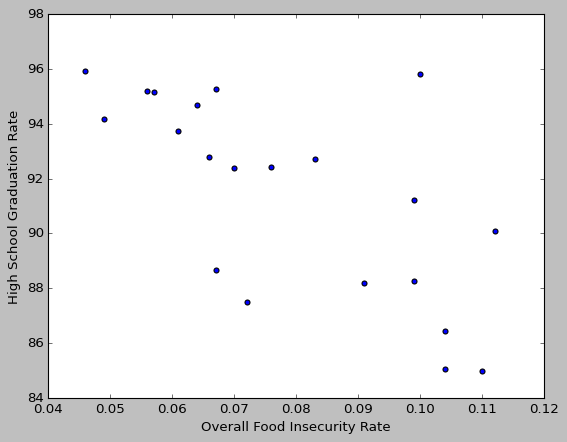

In [58]:
sns.lmplot(x='Overall Food Insecurity Rate', y='High School Graduation Rate', data=SCN5MergeClean, fit_reg=True)
#The best interaction I found in my research came from these two charts. I think this is where I'll want to be trying to focus my research with the later district level stuff.

<Axes: xlabel='Ave. Commute (Min)', ylabel='High School Graduation Rate'>

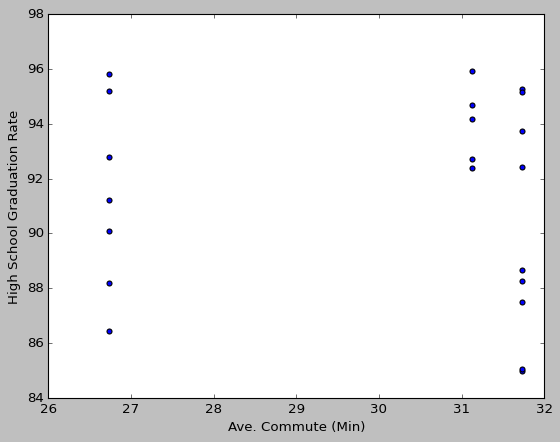

In [63]:
SCN5MergeClean.plot(kind='scatter', y='High School Graduation Rate', x='Ave. Commute (Min)')
#Would love to find this dataset pulled away from the SCN classification. As it stands it's...not super useful.

TypeError: ignored

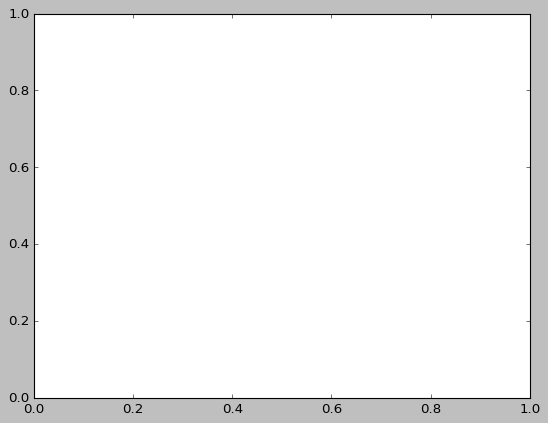

In [66]:
SCN5MergeClean.plot(kind='scatter', y='High School Graduation Rate', x='Value')
#More and more small issues with the current livestock dataset. Not even going to fix this one as I would like to just find a different one at this point.

In [76]:
CovidDataOnly = SCN5MergeClean[SCN5MergeClean['COVID-19 (U07.1)'] != 'NaN']
#Doing some wizardy to drop the missing variables to still examine what's going on.

In [78]:
CovidDataOnly = CovidDataOnly[['COVID-19 (U07.1)', 'High School Graduation Rate']].astype(float)

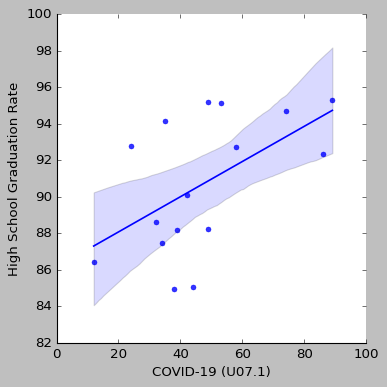

In [79]:
sns.lmplot(x='COVID-19 (U07.1)', y='High School Graduation Rate', data=CovidDataOnly, fit_reg=True)

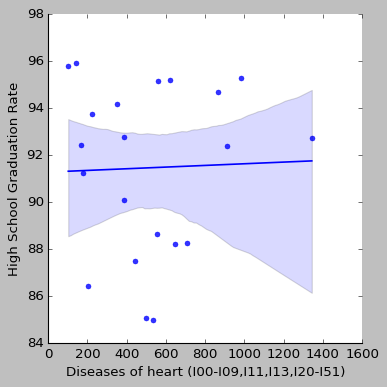

In [68]:
sns.lmplot(x= 'Diseases of heart (I00-I09,I11,I13,I20-I51)', y='High School Graduation Rate', data=SCN5MergeClean, fit_reg=True)
#Both of these have the same issue that I'd like to work on a fix for. I have population data from earlier in the semester
#And a lot of the stats I'm finding are just the raw number, not the number per person
#What would the easiest way with python be to use those two numbers to generate a new variable that represents the ratio?
#So then I can use that to garner a more accurate display then just raw numerical data.

In [ ]:
sns.lmplot(x='Overall Food Insecurity Rate', y='High School Graduation Rate', data=SCN5MergeClean, fit_reg=True)

In [ ]:
sns.lmplot(x='Overall Food Insecurity Rate', y='High School Graduation Rate', data=SCN5MergeClean, fit_reg=True)